In [31]:
#import vaex
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
#from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')


In [32]:
#conda install py-xgboost


In [33]:
df=pd.read_csv('/Users/boltwrath/Desktop/class/projestd/Final/Data/train_data.csv')

In [34]:
#data= [chunk for chunk in df_chunk] # storing chunk after iterating from chunk object
#df= pd.concat(data) # concatinating dataframes to make it complete dataset
#df=pd.read_csv('train_data.csv')

In [35]:
df.head()

,year,month,day,city,medicine,sales
0,2015,1,2,1,1,24.0
1,2015,1,2,1,2,144.0
2,2015,1,2,1,3,84.0
3,2015,1,2,1,4,24.0
4,2015,1,2,1,5,8.0


In [36]:
df['Date']=pd.to_datetime(df[["year","month","day"]])
df['dayofweek'] = df['Date'].dt.dayofweek
df['quarter'] = df['Date'].dt.quarter

In [37]:
df.head()

,year,month,day,city,medicine,sales,Date,dayofweek,quarter
0,2015,1,2,1,1,24.0,2015-01-02,4,1
1,2015,1,2,1,2,144.0,2015-01-02,4,1
2,2015,1,2,1,3,84.0,2015-01-02,4,1
3,2015,1,2,1,4,24.0,2015-01-02,4,1
4,2015,1,2,1,5,8.0,2015-01-02,4,1


In [38]:
df.drop(["Date"], axis=1, inplace=True)

In [39]:
df.drop(["year"], axis=1, inplace=True)

In [40]:
df.info(verbose=True, memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22624345 entries, 0 to 22624344
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   month      int64  
 1   day        int64  
 2   city       int64  
 3   medicine   int64  
 4   sales      float64
 5   dayofweek  int64  
 6   quarter    int64  
dtypes: float64(1), int64(6)
memory usage: 1.2 GB


In [41]:
cat_list=["month","day","city","medicine","dayofweek"]
df[cat_list] = df[cat_list].astype("category")   

In [42]:
#df=df[df.sales >= 0]

In [43]:
df.describe()

,sales,quarter
count,2.262434e+07,2.262434e+07
mean,5.166032e+01,2.402649e+00
std,1.100297e+02,1.118680e+00
min,-9.948000e+03,1.000000e+00
25%,1.200000e+01,1.000000e+00
50%,2.800000e+01,2.000000e+00
75%,5.600000e+01,3.000000e+00
max,8.299200e+04,4.000000e+00


In [44]:
df['sales']=df['sales'].astype(np.int16)

In [45]:
df.isnull().sum()

month        0
day          0
city         0
medicine     0
sales        0
dayofweek    0
quarter      0
dtype: int64

In [46]:
df.isna().sum()

month        0
day          0
city         0
medicine     0
sales        0
dayofweek    0
quarter      0
dtype: int64

In [47]:
df.info(verbose=True, memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22624345 entries, 0 to 22624344
Data columns (total 7 columns):
 #   Column     Dtype   
---  ------     -----   
 0   month      category
 1   day        category
 2   city       category
 3   medicine   category
 4   sales      int16   
 5   dayofweek  category
 6   quarter    int64   
dtypes: category(5), int16(1), int64(1)
memory usage: 345.4 MB


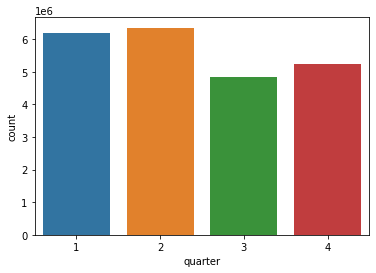

In [48]:
sns.countplot(df['quarter'])
plt.savefig('Quarter_count.png')

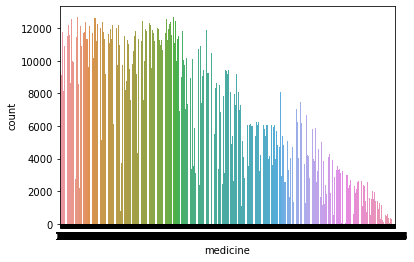

In [18]:
sns.countplot(df['medicine'])
plt.savefig('Medicine_count.png')


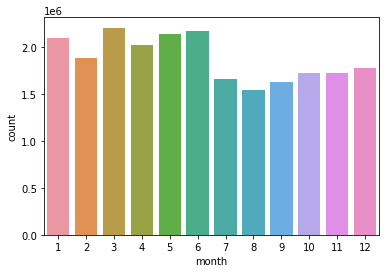

In [19]:
sns.countplot(df['month'])
plt.savefig('Month_count.png')

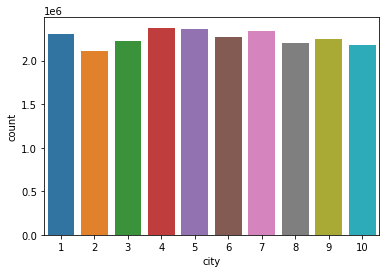

In [20]:
sns.countplot(df['city'])
plt.savefig('City_count.png')

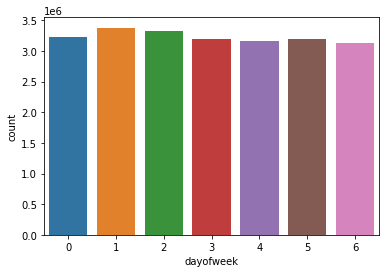

In [21]:
sns.countplot(df['dayofweek'])
plt.savefig('Dayofweek_count.png')

In [22]:
month_grp= df.groupby(['month'])
day_grp= df.groupby(['day'])
city_grp= df.groupby(['city'])
medicine_grp= df.groupby(['medicine'])
dayofweek_grp= df.groupby(['dayofweek'])
#quarter_grp= df.groupby(['quarter'])
sales_grp= df.groupby(['sales'])


In [23]:
month_agg=month_grp['sales'].agg(['mean','std'])

In [24]:
day_agg=day_grp['sales'].agg(['mean','std'])

In [25]:
dayofweek_agg=dayofweek_grp['sales'].agg(['mean','std'])

In [26]:
#quarter_agg=quarter_grp['sales'].agg(['mean','std'])

In [27]:
medicine_agg=medicine_grp['sales'].agg(['mean','std'])

In [28]:
city_agg=city_grp['sales'].agg(['mean','std'])
city_agg.describe()

,mean,std
count,10.000000,10.000000
mean,51.188844,100.947602
std,12.901420,32.606540
min,33.350248,53.778924
25%,39.896148,77.422948
50%,50.991895,102.988663
75%,60.245029,114.637762
max,72.661530,165.751310


In [29]:
main= pd.merge(df,city_agg,on='city')
main.head(30) 
main.rename(columns = {'mean': 'city_mean','std': 'city_std'}, inplace = True)


In [30]:
main.head()

,month,day,city,medicine,sales,dayofweek,city_mean,city_std
0,1,2,1,1,24,4,60.401558,116.791928
1,1,2,1,2,144,4,60.401558,116.791928
2,1,2,1,3,84,4,60.401558,116.791928
3,1,2,1,4,24,4,60.401558,116.791928
4,1,2,1,5,8,4,60.401558,116.791928


In [28]:
#main.describe()

In [29]:
main2= pd.merge(main,month_agg,on='month')
main2.rename(columns = {'mean': 'month_mean','std': 'month_std'}, inplace = True)

In [30]:
#main2.describe()

In [31]:
main3= pd.merge(main2,day_agg,on='day') 
main3.rename(columns = {'mean': 'day_mean','std': 'day_std'}, inplace = True)


In [32]:
#main3.describe()

In [33]:
main4= pd.merge(main3,medicine_agg,on='medicine')
main4.rename(columns = {'mean': 'medicine_mean', 'std': 'medicine_std'}, inplace = True)


In [34]:
#main4.describe()

In [35]:
main_df= pd.merge(main4,dayofweek_agg,on='dayofweek') 
main_df.rename(columns = {'mean': 'dayofweek_mean', 'std': 'dayofweek_std'}, inplace = True)

In [36]:
#main5.describe()

In [37]:
#main_df= pd.merge(main5,quarter_agg,on='quarter')
#main_df.rename(columns = {'mean': 'quarter_mean','std': 'quarter_std'}, inplace = True)
#main_df.describe()


In [38]:
drop=["month","day","city","medicine","dayofweek"]

In [39]:
main_df.drop(drop, axis=1, inplace=True)

In [40]:
main_df.corr()

,sales,city_mean,city_std,month_mean,month_std,day_mean,day_std,medicine_mean,medicine_std,dayofweek_mean,dayofweek_std
sales,1.000000,0.114083,0.111010,0.030597,0.027913,0.031815,0.008951,0.635772,0.518792,0.082528,0.074883
city_mean,0.114083,1.000000,0.973061,-0.000876,-0.000659,-0.001640,-0.000280,-0.012958,-0.008443,-0.004430,-0.004035
city_std,0.111010,0.973061,1.000000,-0.000752,-0.000556,-0.001475,-0.000279,-0.012266,-0.007916,-0.003765,-0.003500
month_mean,0.030597,-0.000876,-0.000752,1.000000,0.912267,0.008206,0.000198,0.014678,0.019458,-0.008584,-0.000679
month_std,0.027913,-0.000659,-0.000556,0.912267,1.000000,0.012469,0.004842,0.009581,0.016678,-0.010951,-0.003308
day_mean,0.031815,-0.001640,-0.001475,0.008206,0.012469,1.000000,0.281352,-0.004046,-0.003328,-0.008876,-0.004561
day_std,0.008951,-0.000280,-0.000279,0.000198,0.004842,0.281352,1.000000,-0.001020,-0.000511,-0.008351,0.000672
medicine_mean,0.635772,-0.012958,-0.012266,0.014678,0.009581,-0.004046,-0.001020,1.000000,0.816004,-0.010895,-0.009049
medicine_std,0.518792,-0.008443,-0.007916,0.019458,0.016678,-0.003328,-0.000511,0.816004,1.000000,-0.009236,-0.007869
dayofweek_mean,0.082528,-0.004430,-0.003765,-0.008584,-0.010951,-0.008876,-0.008351,-0.010895,-0.009236,1.000000,0.907359


<AxesSubplot:>

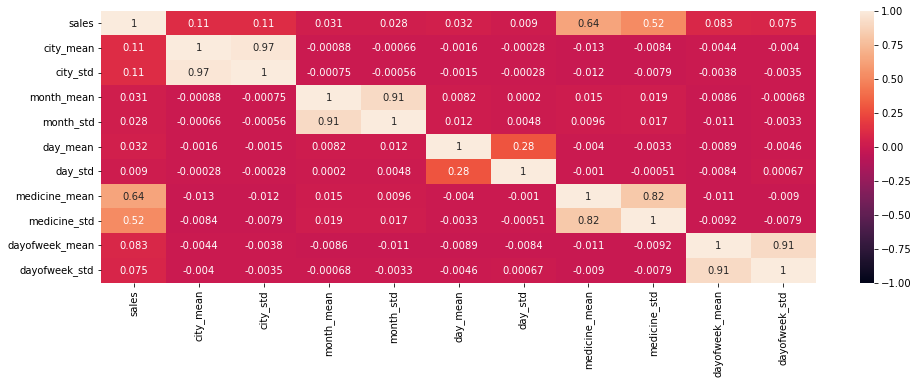

In [42]:
plt.figure(figsize = (16,5))
sns.heatmap(main_df.corr(),vmin=-1, vmax=1, annot=True)

In [41]:
def correlation(dataset, thrashold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j]) > thrashold:
                colname= corr_matrix.columns[i]
                col_corr.add(colname)
               
    return col_corr        

In [42]:
corr_features =correlation(main_df, 0.7)
len(set(corr_features))
corr_features

{'city_std', 'dayofweek_std', 'medicine_std', 'month_std'}

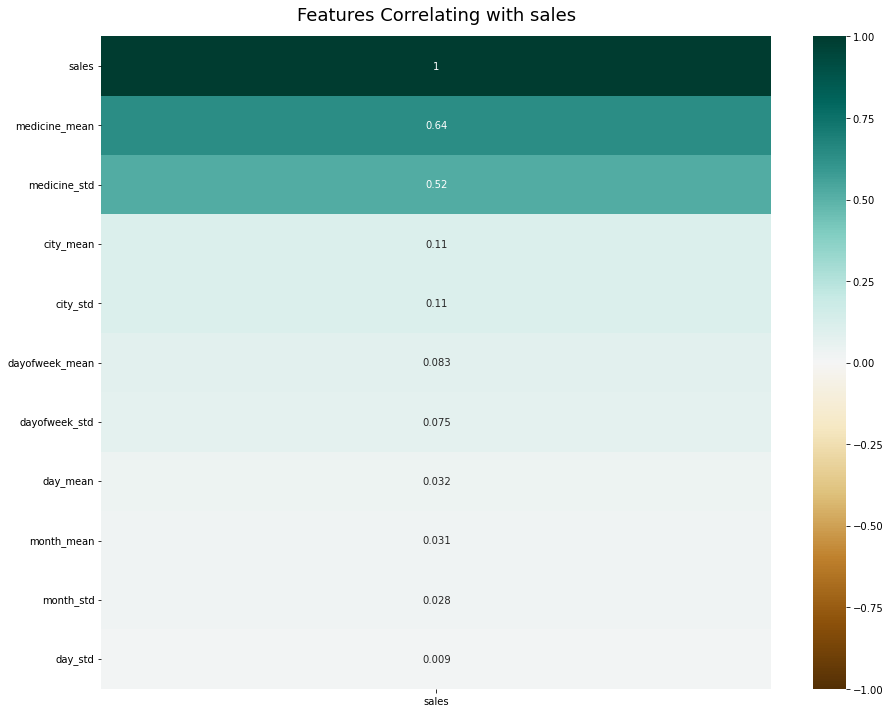

In [47]:
plt.figure(figsize=(15, 12))
heatmap = sns.heatmap(main_df.corr()[['sales']].sort_values(by='sales', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with sales', fontdict={'fontsize':18}, pad=16);

In [43]:
drop=["month_std","month_mean","day_mean","day_std","medicine_std","city_std","dayofweek_std"]

In [44]:
main_df.drop(drop, axis=1, inplace=True)

In [45]:
main_df.head()

,sales,city_mean,medicine_mean,dayofweek_mean
0,24,60.401558,23.153118,44.82919
1,24,33.350248,23.153118,44.82919
2,24,37.913428,23.153118,44.82919
3,80,72.661530,23.153118,44.82919
4,32,63.244907,23.153118,44.82919


In [46]:
main_df.dropna()

,sales,city_mean,medicine_mean,dayofweek_mean
0,24,60.401558,23.153118,44.82919
1,24,33.350248,23.153118,44.82919
2,24,37.913428,23.153118,44.82919
3,80,72.661530,23.153118,44.82919
4,32,63.244907,23.153118,44.82919
...,...,...,...,...
22624340,12,36.713226,13.058824,41.76365
22624341,4,63.244907,20.000000,41.76365
22624342,4,37.913428,4.000000,41.76365
22624343,4,59.775443,4.000000,41.76365


In [47]:
#main_df[main_df < 0] = 0

In [48]:
main_df.head()

,sales,city_mean,medicine_mean,dayofweek_mean
0,24,60.401558,23.153118,44.82919
1,24,33.350248,23.153118,44.82919
2,24,37.913428,23.153118,44.82919
3,80,72.661530,23.153118,44.82919
4,32,63.244907,23.153118,44.82919


In [49]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [50]:
clean_dataset(main_df)

,sales,city_mean,medicine_mean,dayofweek_mean
0,24.0,60.401558,23.153118,44.82919
1,24.0,33.350248,23.153118,44.82919
2,24.0,37.913428,23.153118,44.82919
3,80.0,72.661530,23.153118,44.82919
4,32.0,63.244907,23.153118,44.82919
...,...,...,...,...
22624340,12.0,36.713226,13.058824,41.76365
22624341,4.0,63.244907,20.000000,41.76365
22624342,4.0,37.913428,4.000000,41.76365
22624343,4.0,59.775443,4.000000,41.76365


In [51]:
y=main_df["sales"]
X=main_df.drop('sales', axis=1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=123,shuffle=False)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(18099476, 3)
(4524869, 3)
(18099476,)
(4524869,)


In [52]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train))
X_val = pd.DataFrame(scaler.transform(X_val))

In [53]:
X_train.head()

,0,1,2
0,0.719484,-0.423064,-0.905772
1,-1.490604,-0.423064,-0.905772
2,-1.117793,-0.423064,-0.905772
3,1.721122,-0.423064,-0.905772
4,0.951785,-0.423064,-0.905772


In [57]:
lm2 = LinearRegression(n_jobs=-1)
# Fit Model
lm2.fit(X_train, y_train)
# Predict
y_pred_train = lm2.predict(X_train)
y_pred_val = lm2.predict(X_val)
 #RMSE
print(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))    
print(np.sqrt(metrics.mean_squared_error(y_val, y_pred_val)))

81.69827055720897
79.05465822210664


In [58]:
clf_rf = RandomForestRegressor(n_estimators=100,max_features=3,random_state=1, n_jobs= -1)

clf_rf.fit(X=X_train, y=y_train)

y_pred_train = clf_rf.predict(X_train)


y_pred_val = clf_rf.predict(X_val)


In [59]:
print(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print(np.sqrt(metrics.mean_squared_error(y_val, y_pred_val)))

67.02063265235735
66.17443330289346


In [63]:
#rfc_grid = RandomForestRegressor(n_jobs=-1,max_features='sqrt')
 
# Use a grid over parameters of interest

#param_grid = { 
          # "n_estimators" : [9, 18, 27, 36, 45, 54, 63],
          # "max_depth" : [5, 10],
          # "min_samples_leaf" : [2, 4]}
 
#rfc_cv_grid = GridSearchCV(estimator = rfc_grid, param_grid = param_grid, cv = 10)

In [ ]:
#rfc_cv_grid.fit(X = X_train, y = y_train)

In [ ]:
#print(rfc_cv_grid.best_score_,rfc_cv_grid.best_params_)

In [ ]:
#y_pred_train = rfc_cv_grid.predict(X_train)
#y_pred_val = rfc_cv_grid.predict(X_val)

In [ ]:
#print(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
#print(np.sqrt(metrics.mean_squared_error(y_val, y_pred_val)))

In [59]:
GBM_model = GradientBoostingRegressor(n_estimators=100,
                                       learning_rate=0.3,
                                       subsample=0.8)

In [63]:
%time GBM_model.fit(X=X_train, y=y_train)

CPU times: user 8min 53s, sys: 38.7 s, total: 9min 32s
Wall time: 9min 36s


GradientBoostingRegressor(learning_rate=0.3, subsample=0.8)

In [64]:
y_pred_train = GBM_model.predict(X_train)
y_pred_val = GBM_model.predict(X_val)

In [65]:
print(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print(np.sqrt(metrics.mean_squared_error(y_val, y_pred_val)))

75.20381498831429
71.29845646652653


In [66]:
# Model in use
#GBM = GradientBoostingClassifier() 
 
# Use a grid over parameters of interest
#param_grid = { 
          # "n_estimators" : [50,100,150],
           #"max_depth" : [5, 10],
          # "learning_rate" : [0.1,0.2,0.3]}
 
#CV_GBM = GridSearchCV(estimator=GBM, param_grid=param_grid, cv=5)

In [67]:
#%time CV_GBM.fit(X=X_train, y=y_train)

In [68]:
#best_gbm_model = CV_GBM.best_estimator_
#print (CV_GBM.best_score_, CV_GBM.best_params_)

In [69]:
#y_pred_train=best_gbm_model.predict(X_train)
#y_pred_val=best_gbm_model.predict(X_val)

In [70]:
#print(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
#print(np.sqrt(metrics.mean_squared_error(y_val, y_pred_val)))

In [ ]:
clf_adaboost =  AdaBoostRegressor(n_estimators = 100,
    learning_rate = 0.4)

clf_adaboost.fit(X_train, y_train)

y_pred_train = clf_adaboost.predict(X_train)
y_pred_val = clf_adaboost.predict(X_val)


In [ ]:
print(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print(np.sqrt(metrics.mean_squared_error(y_val, y_pred_val)))

In [56]:
XGB_model = XGBRegressor(n_estimators=100, gamma=0.5,learning_rate=0.1, n_jobs=-1)
%time XGB_model.fit(X_train, y_train)

CPU times: user 28min 44s, sys: 2min 46s, total: 31min 30s
Wall time: 4min 23s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0.5, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='approx', validate_parameters=1, verbosity=None)

In [57]:
y_pred_train = XGB_model.predict(X_train)
y_pred_val = XGB_model.predict(X_val)

In [58]:
print(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print(np.sqrt(metrics.mean_squared_error(y_val, y_pred_val)))

81.90304
80.743866


In [60]:
XGB = XGBRegressor(n_jobs=-1)
 
# Use a grid over parameters of interest
param_grid = {
     'colsample_bytree': np.linspace(0.6, 0.8, 2),
     'n_estimators':[100,200],
     'max_depth': [5, 10]
}

CV_XGB = GridSearchCV(estimator=XGB, param_grid=param_grid, cv= 10)

In [ ]:
%time CV_XGB.fit(X = X_train, y=y_train)

In [ ]:
best_xgb_model = CV_XGB.best_estimator_
print (CV_XGB.best_score_, CV_XGB.best_params_)

In [ ]:
y_pred_train=best_xgb_model.predict(X_train)
y_pred_val=best_xgb_model.predict(X_val)

In [ ]:
print(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print(np.sqrt(metrics.mean_squared_error(y_val, y_pred_val)))

In [60]:
#main_df.describe()